# Atividade 4

Considere um conjunto de dados obtidos analisando imagens de câncer de mama, onde há o diagnóstico se o tumor é maligno ou benigno. Seu objetivo é desenvolver e avaliar modelos para realizar a classificação de câncer de mama em Maligno (1) ou Benigno (0). Esse modelo deve ter uma saída probabilística que indique a probabilidade de um tumor ser maligno. Você deverá cumprir os seguintes requerimentos:

1) Carregue o conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set. Ele pode ser obtido através do sklearn.datasets, da UCI Machine Learning Repository ou do Kaggle.

2) Realize uma breve análise exploratória dos dados, criando ao menos 3 gráficos. Há desbalanceamento entre as classes? Extra: quais atributos são mais importantes para classificação?

3) Separe os dados em conjuntos de treino e teste, usando random_state = 42. Os dados de treino podem ser subdivididos em treino e validação de forma livre para ajustar hiperparâmetros.

4) Treine e avalie no conjunto de teste um modelo de regressão logística usando hiperparâmetros default e todos os dados de entrada, como baseline de desempenho. Lembre-se de normalizar os dados de entrada. As métricas de avaliação serão Acurácia, Precision, Recall, F1 score e AUC.

5) Treine pelo menos mais 3 modelos de regressão logística diferentes, treinando e avaliando nos conjuntos de treino e validação. Modelos diferentes incluem usar atributos diferentes, transformações não-lineares nos atributos (regressão logística polinomial) ou diferentes hiperparâmetros. Após isso, escolha o melhor desses modelos para retreinar com todos os dados de treino e avalie no conjunto de teste. Compare com o resultado com a baseline. Dica: pode-se utilizar o grid search.

6) Extra: utilize um modelo ainda não estudado na mentoria para realizar a classificação, avaliando no conjunto de teste. Compare os resultados.

In [311]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [312]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [313]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [314]:
df['target'].values
maligno = 0
benigno = 0
for i in range(len(df['target'])):
    if df['target'][i] == 1:
        maligno += 1
    else:
        benigno += 1
print(f'Quantidade de tumores benignos: {benigno}')
print(f'Quantidade de tumores malignos: {maligno}')
#Existe uma quantidade muito maior de tumores malignos, logo o dataset é desbalanceado.

Quantidade de tumores benignos: 212
Quantidade de tumores malignos: 357


<AxesSubplot:xlabel='mean texture', ylabel='mean radius'>

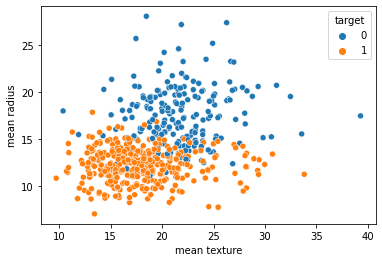

In [315]:
sns.scatterplot(x='mean texture', y='mean radius', hue='target', data=df)

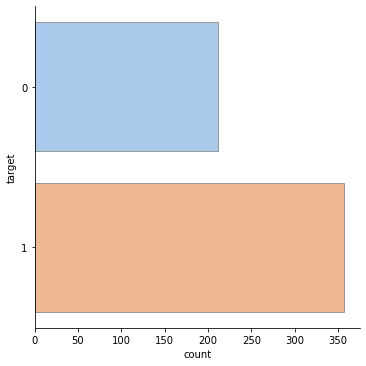

In [316]:
sns.catplot(y="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<AxesSubplot:xlabel='mean compactness', ylabel='mean concavity'>

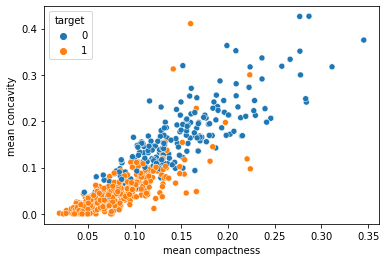

In [317]:
sns.scatterplot(x='mean compactness', y='mean concavity', hue='target', data=df)

### 1° Modelo - Baseline

In [318]:
X = df.drop(['target'], axis=1)
y = df['target'].to_numpy().reshape(-1, 1)

#### Treinando no conjunto de treino, e testando no de test.

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [320]:
LR = LogisticRegression()
LR.fit(X_train_n, y_train.ravel())

LogisticRegression()

In [321]:
y_predict = LR.predict(X_test_n).reshape(-1, 1)

In [322]:
from sklearn.metrics import accuracy_score
A1 = accuracy_score(y_test, y_predict)
A1

0.9824561403508771

In [323]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, y_predict)
F1

0.9861111111111112

In [324]:
from sklearn.metrics import precision_score
P1 = precision_score(y_test, y_predict)
P1

0.9726027397260274

In [325]:
from sklearn.metrics import recall_score
R1 = recall_score(y_test, y_predict)
R1

1.0

In [326]:
from sklearn.metrics import roc_auc_score
AUC1 = roc_auc_score(y_test, y_predict)
AUC1

0.9767441860465117

### 2° Modelo - GridSearchCV

In [327]:
X = df[['mean texture', 'mean smoothness', 'mean radius']]
y = df['target']

#### Treinando no conjunto de treino, e ajustando no de teste.

In [328]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid, test_size=0.2)

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_valid_n = scaler.transform(X_valid)

In [329]:
LR = LR = LogisticRegression()
LR.fit(X_train_n, y_train.ravel())

LogisticRegression()

In [330]:
from sklearn.model_selection import GridSearchCV
metricas = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
parameters = {'penalty':['l2', 'none'],
              'max_iter':[250, 400, 600],
              'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
clf = GridSearchCV(LR, param_grid=parameters, scoring=metricas, refit='precision', return_train_score=False)
clf.fit(X_train_n, y_train.ravel())
clf.best_estimator_

LogisticRegression(max_iter=250, penalty='none', solver='newton-cg')

In [331]:
y_predict = clf.predict(X_valid_n)

In [332]:
print(f'accuracy: {accuracy_score(y_valid, y_predict)}')
print(f'precision: {precision_score(y_valid, y_predict)}')
print(f'recall: {recall_score(y_valid, y_predict)}')
print(f'f1 score: {f1_score(y_valid, y_predict)}')
print(f'AUC: {roc_auc_score(y_valid, y_predict)}')

accuracy: 0.9120879120879121
precision: 0.9333333333333333
recall: 0.9333333333333333
f1 score: 0.9333333333333333
AUC: 0.9021505376344086


### 3° Modelo - Regressão Logística Polinomial

In [333]:
#Utilizando os mesmos atributos do 2° modelo:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train_n)

In [334]:
LR = LogisticRegression(max_iter=250, penalty='none', solver='newton-cg')
LR.fit(X_poly, y_train.ravel())

LogisticRegression(max_iter=250, penalty='none', solver='newton-cg')

In [335]:
y_predict = LR.predict(X_valid_n)

ValueError: X has 3 features per sample; expecting 9

In [ ]:
print(f'accuracy: {accuracy_score(y_valid, y_predict)}')
print(f'precision: {precision_score(y_valid, y_predict)}')
print(f'recall: {recall_score(y_valid, y_predict)}')
print(f'f1 score: {f1_score(y_valid, y_predict)}')
print(f'AUC: {roc_auc_score(y_valid, y_predict)}')

### Avaliando o 2° modelo no conjunto de teste.

In [336]:
scaler = MinMaxScaler()
X_train_valid_n = scaler.fit_transform(X_train_valid)
X_test_n = scaler.transform(X_test)

In [337]:
LR = LogisticRegression(max_iter=250, penalty='none', solver='newton-cg')
LR.fit(X_train_valid_n, y_train_valid.ravel())

LogisticRegression(max_iter=250, penalty='none', solver='newton-cg')

In [338]:
y_predict = LR.predict(X_test_n)

In [339]:
A2 = accuracy_score(y_test, y_predict)
P2 = precision_score(y_test, y_predict)
R2 = recall_score(y_test, y_predict)
F2 = f1_score(y_test, y_predict)
AUC2 = roc_auc_score(y_test, y_predict)
print(f'accuracy: {A2}')
print(f'precision: {P2}')
print(f'recall: {R2}')
print(f'f1 score: {F2}')
print(f'AUC: {AUC2}')

accuracy: 0.9473684210526315
precision: 0.9577464788732394
recall: 0.9577464788732394
f1 score: 0.9577464788732394
AUC: 0.9439895185063871


### Comparação dos modelos

In [340]:
data = {'Modelos': ['baseline', 'gridsearch'],
        'accuracy': [A1, A2],
        'precision': [P1, P2],
        'recall': [R1, R2],
        'f1': [F1,F2],
        'AUC':[AUC1, AUC2]}
tabela = pd.DataFrame(data)
tabela

,Modelos,accuracy,precision,recall,f1,AUC
0,baseline,0.982456,0.972603,1.000000,0.986111,0.976744
1,gridsearch,0.947368,0.957746,0.957746,0.957746,0.943990


##### Como pode-se ver na tabela acima, o modelo baseline se mostrou superior ao modelo em que foi utilizado gridsearch, obtendo resultados melhores em todas as métricas.